In [1]:
import sys
import os
sys.path.insert(0, f'{os.getenv("HOME")}/Devel/simgio/PYsimgio/')

import simgio_utils as su
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import StrMethodFormatter, NullFormatter

In [2]:
n_tasks = 60
n_executions = 200
nh_max = 41


t_begin = 6000
t_end = 14000


heuristics = [
    "FairShare",
    "Exclusive-FCFS",
    "Set-10",
    "Set-FairShare",
    "Sharing+Priority"
]


df_all, ev = su.load_all(priorities=heuristics, n_tasks=n_tasks, n_executions=n_executions, csv_folder="csv/")
df_all = su.compute_metrics(df_all,t_begin, t_end)

df_fairshare = ev.loc[ev.priority == "FairShare"]
df_exclusive = ev.loc[ev.priority == "Exclusive-FCFS"]
df_set10 = ev.loc[ev.priority == "Set-10"]


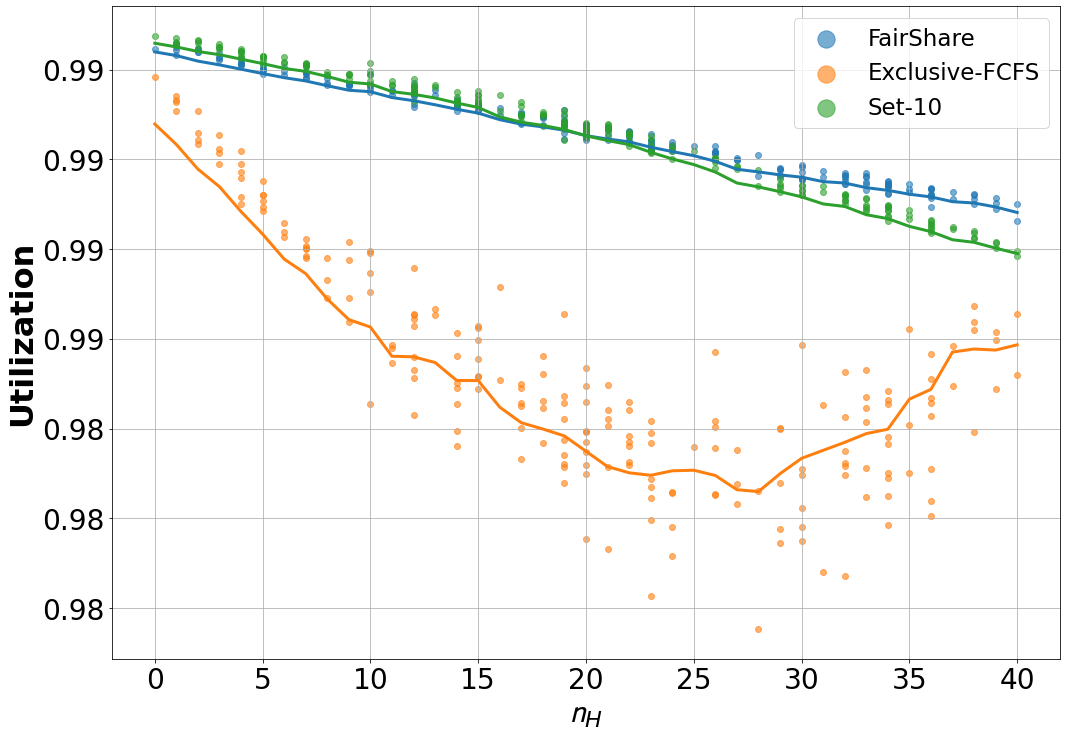

In [3]:
su.plot_scatter_utilization({"FairShare": df_fairshare,
                            "Exclusive-FCFS": df_exclusive,
                             "Set-10": df_set10},
                            x_plot=[i for i in range(0, nh_max)],
                            granularity=3.5,
                            figsize=(17, 12))

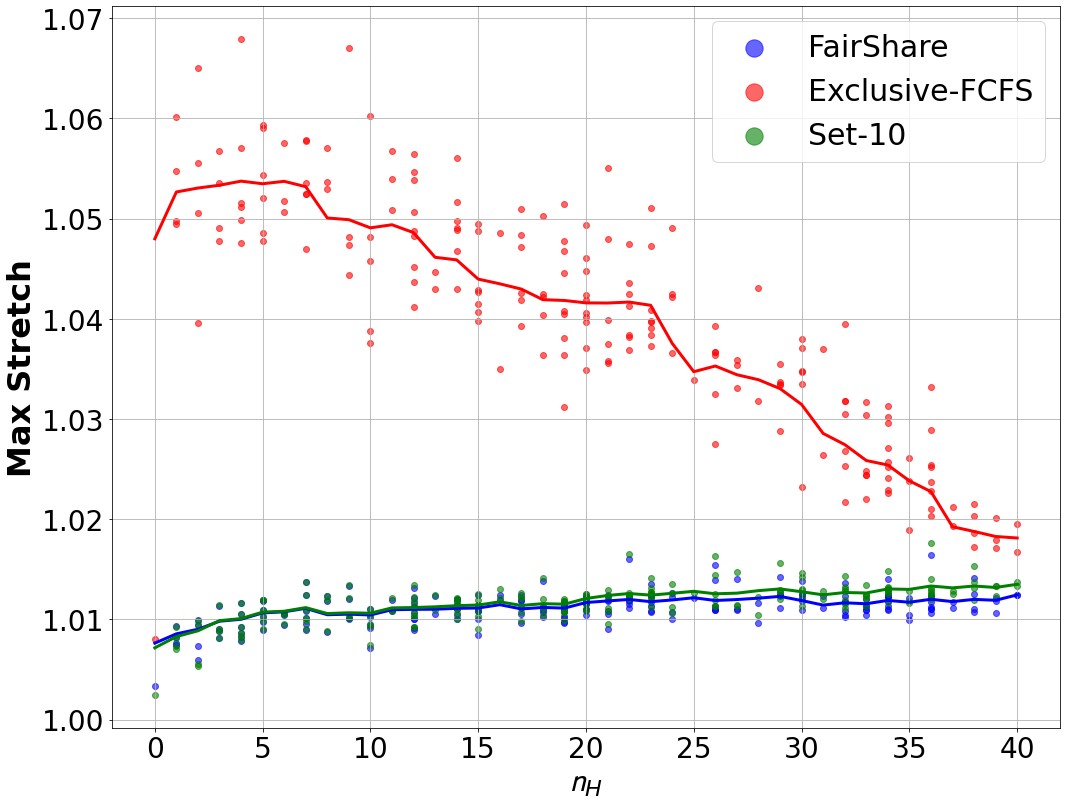

In [4]:
x_plot=[i for i in range(0, 41)]
colors=['blue', 'red', 'green']

su.plot_stretch_max(
    {"FairShare": ev.loc[ev.priority=="FairShare"],
    "Exclusive-FCFS": ev.loc[ev.priority=='Exclusive-FCFS'],
    "Set-10": ev.loc[ev.priority=='Set-10']},
    figsize=(17,12),
    colors=colors,
    x_plot=x_plot,
    granularity=2,
    save_to=f"max_stretch_{n_tasks}.pdf")

In [5]:
# Max stretch relative
y_values = su.plot_stretch_max_norm(
    {"Exclusive-FCFS": ev.loc[ev.priority=='Exclusive-FCFS'],
     "Set-10": ev.loc[ev.priority=='Set-10'] },
    df = ev.loc[ev.priority == "FairShare"],
    figsize=(17,12),
    colors=['red', 'green'],    
    save_to=f"max_stretch_relative_{n_tasks}.pdf")

In [9]:
from scipy import stats

fairshare = df_all.loc[df_all.priority == "FairShare"]
set10 = df_all.loc[df_all.priority == "Set-10"]

In [10]:
gb = set10.groupby("execution_id")
gb_norm = fairshare.groupby("execution_id")

In [11]:
df_fairshare = df_all.loc[df_all.priority == "FairShare"].reset_index().sort_values(["execution_id", "app_id"])
df_exclusive = df_all.loc[df_all.priority == "Exclusive-FCFS"].reset_index().sort_values(["execution_id", "app_id"])
df_set10 = df_all.loc[df_all.priority == "Set-10"].reset_index().sort_values(["execution_id", "app_id"])


In [12]:
#df_fairshare['io_slowdown_norm']

df_fairshare['io_slowdown_norm'] = (1 - (df_fairshare.io_slowdown.values / df_set10.io_slowdown.values)) * 100
df_exclusive['io_slowdown_norm'] = (1 - (df_exclusive.io_slowdown.values / df_set10.io_slowdown.values)) * 100

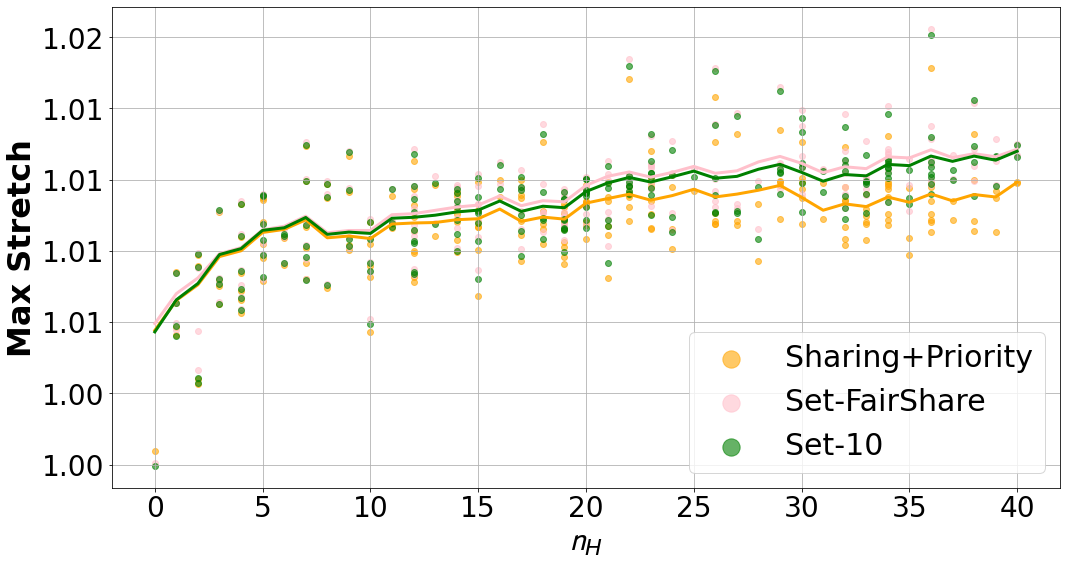

In [13]:
su.plot_stretch_max({
    "Sharing+Priority": ev.loc[ev.priority == "Sharing+Priority"],
    "Set-FairShare": ev.loc[ev.priority == "Set-FairShare"],
    "Set-10": ev.loc[ev.priority == "Set-10"]},
x_plot=[i for i in range(0, nh_max)],
colors=['orange', 'pink', 'green'],
granularity=2)

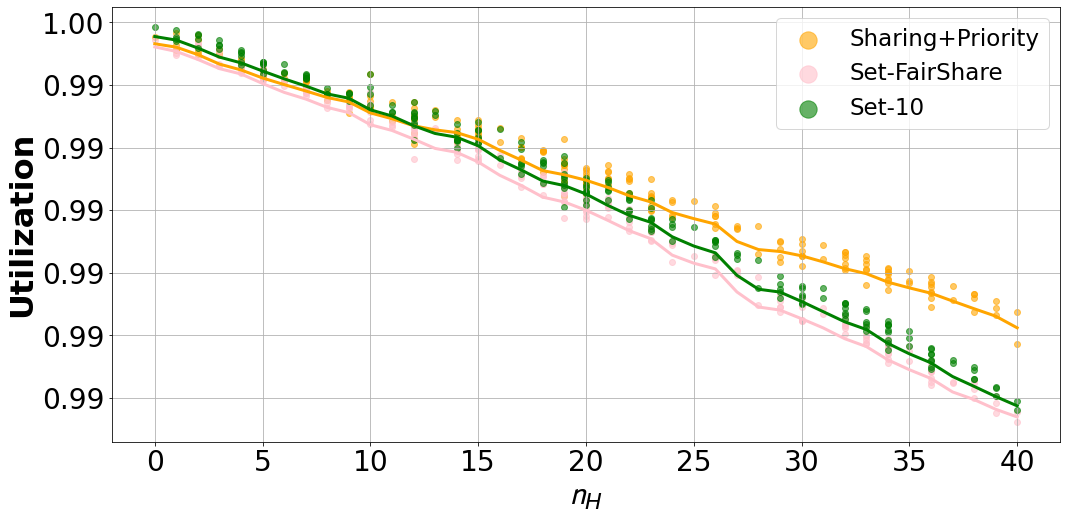

In [14]:
su.plot_scatter_utilization({
    "Sharing+Priority": ev.loc[ev.priority == "Sharing+Priority"],
    "Set-FairShare": ev.loc[ev.priority == "Set-FairShare"],
    "Set-10": ev.loc[ev.priority == "Set-10"]},
x_plot=[i for i in range(0, nh_max)],
colors=['orange', 'pink', 'green'],

granularity=2)

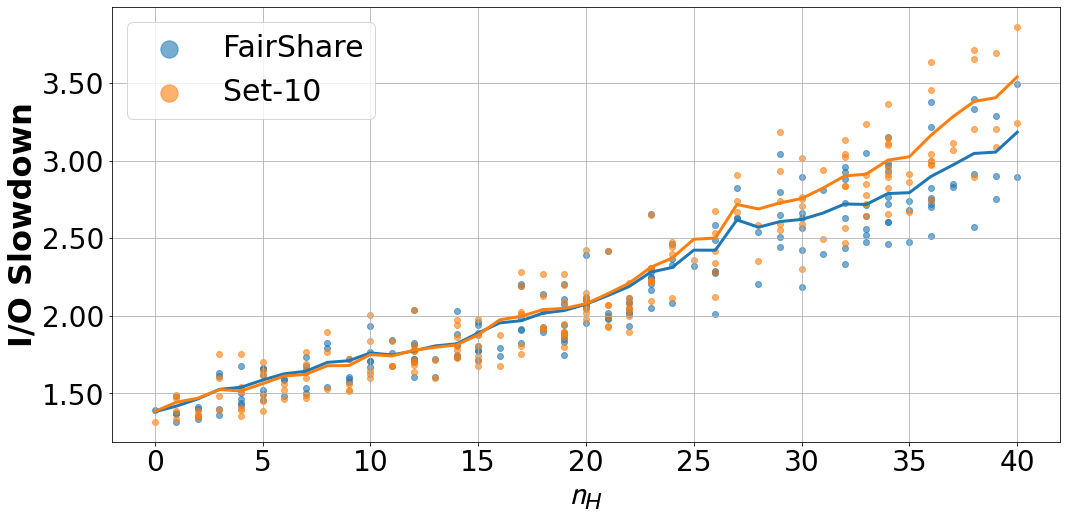

In [15]:
su.plot_scatter_io_slowdown_gmean({
    "FairShare": df_all.loc[df_all.priority == "FairShare"],
    #"Exclusive-FCFS": df_all.loc[df_all.priority == "Exclusive-FCFS"],
    "Set-10": df_all.loc[df_all.priority == "Set-10"],
},
x_plot=[i for i in range(0, nh_max)],
granularity=2)

